# Cat vs Dog Image Classification

Author: Patrick Zhong

Date: March 9th, 2018

----

# 1. Problem Definition

## Overview

The goal of the project is to use deep learning to classify cats and dogs in photos. Deep learning is an important subbranch of machine learning, which is simply a technology to let computer algorithmn to learn by itself, and to improve itself during the learning process. There are many practical applications of machine learning, such as data predicition, automous driving, art creation, and imagine classification which is what this project is about. Machine learning is one of the most important and fast-growing technology in the world, and deep learning is the most advanced and eyes-catching field in machine learning.

In machine learning, imagine classification is one of the most popular applications. It is being used in industries like security, medical, argriculture, and manufacturing. Imagine classfication can help with repeatitive work that require human eyes to classify. For example, helping doctors to diagnose certain eye diseases, or helping factory workers to detect defective products. In fact, image classification is common in our daily lives. The iPhone's People Albumn feature is an example.

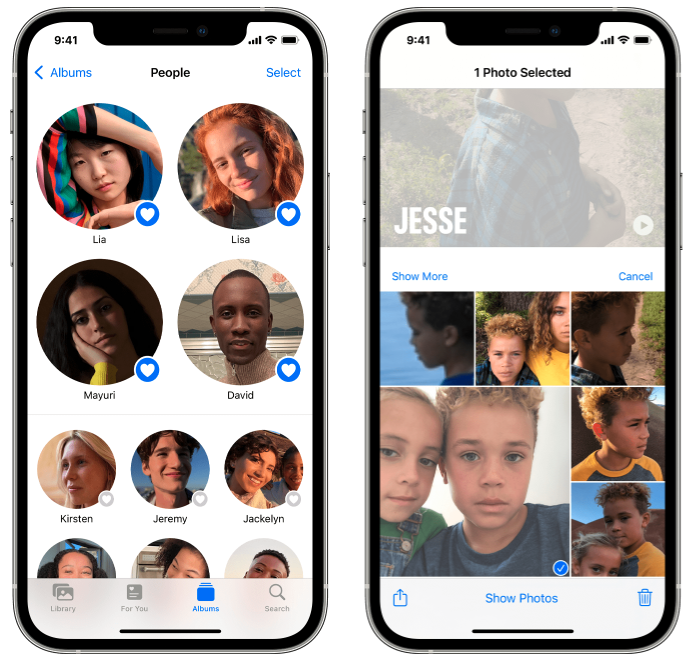

The mission of this project is relatively simple, which is classify dogs and cats. However, if we can train a computer to classify animals, then we can do the same on things like pornography and violent images, so we can better protect the next generations from harmful contents.

## Description

The goal is to teach the computer to detect dogs and cats from different images, and make accurate classification. Technically speaking, we will build a binary image classifier. 

How machine learning works is similar to human beings' learning process. For instance, all children learn to recognize objects in the world via trials and errors.  

Let's imagine a scene. One day, a little boy was walking with his mother in a park. He saw a mouse chasing by an unknown animal. Being curious, he asked mommy about that animal with a long tail. 

"It is a cat, my boy", the mother calmly said. 

"Why is it chasing the mouse?", the boy asked again. 

"Because they are good friends, and they play like that all day long", the mother smiled kindly.

The boy nodded, and seem to learn something new. After a few day, they walked in the same park. A fury animal barked at a bird on a tree. Feeling a bit scared, the boy asked the mother why the cat is barking the bird. The mother said, oh no, that is a dog, not a cat. The boy was confused, pointed at the tail of the dog and said, "Isn't it has a long tail like the cat we saw couple days ago?". The mother patiently explained to the boy that not all animals with a long tail are cats. "The cats meow and the dogs bark.", the mother tried to teach the boy how to distinguish the animals. The boy nodded, though he was still a bit confused.

This story is a simpe anology of how human beings learn to recognize things. In fact, a human brain is by far the most complex and powerful computer machine. For example, the boy not only learned to recognize animals by asking questions, but also learned by observation. The neurons in his brain are working and making connections, so the boy will learn to classify animals via small features, such as body shape, fur color, size of eyes, and mouth length. A human being does this both conciously and subconciously. It takes a bit more effort during learning, but it will be effortless after. Just like the mother, it was a bit difficult for her to explain by words because she recongizes things by the trained "model" in her brian.

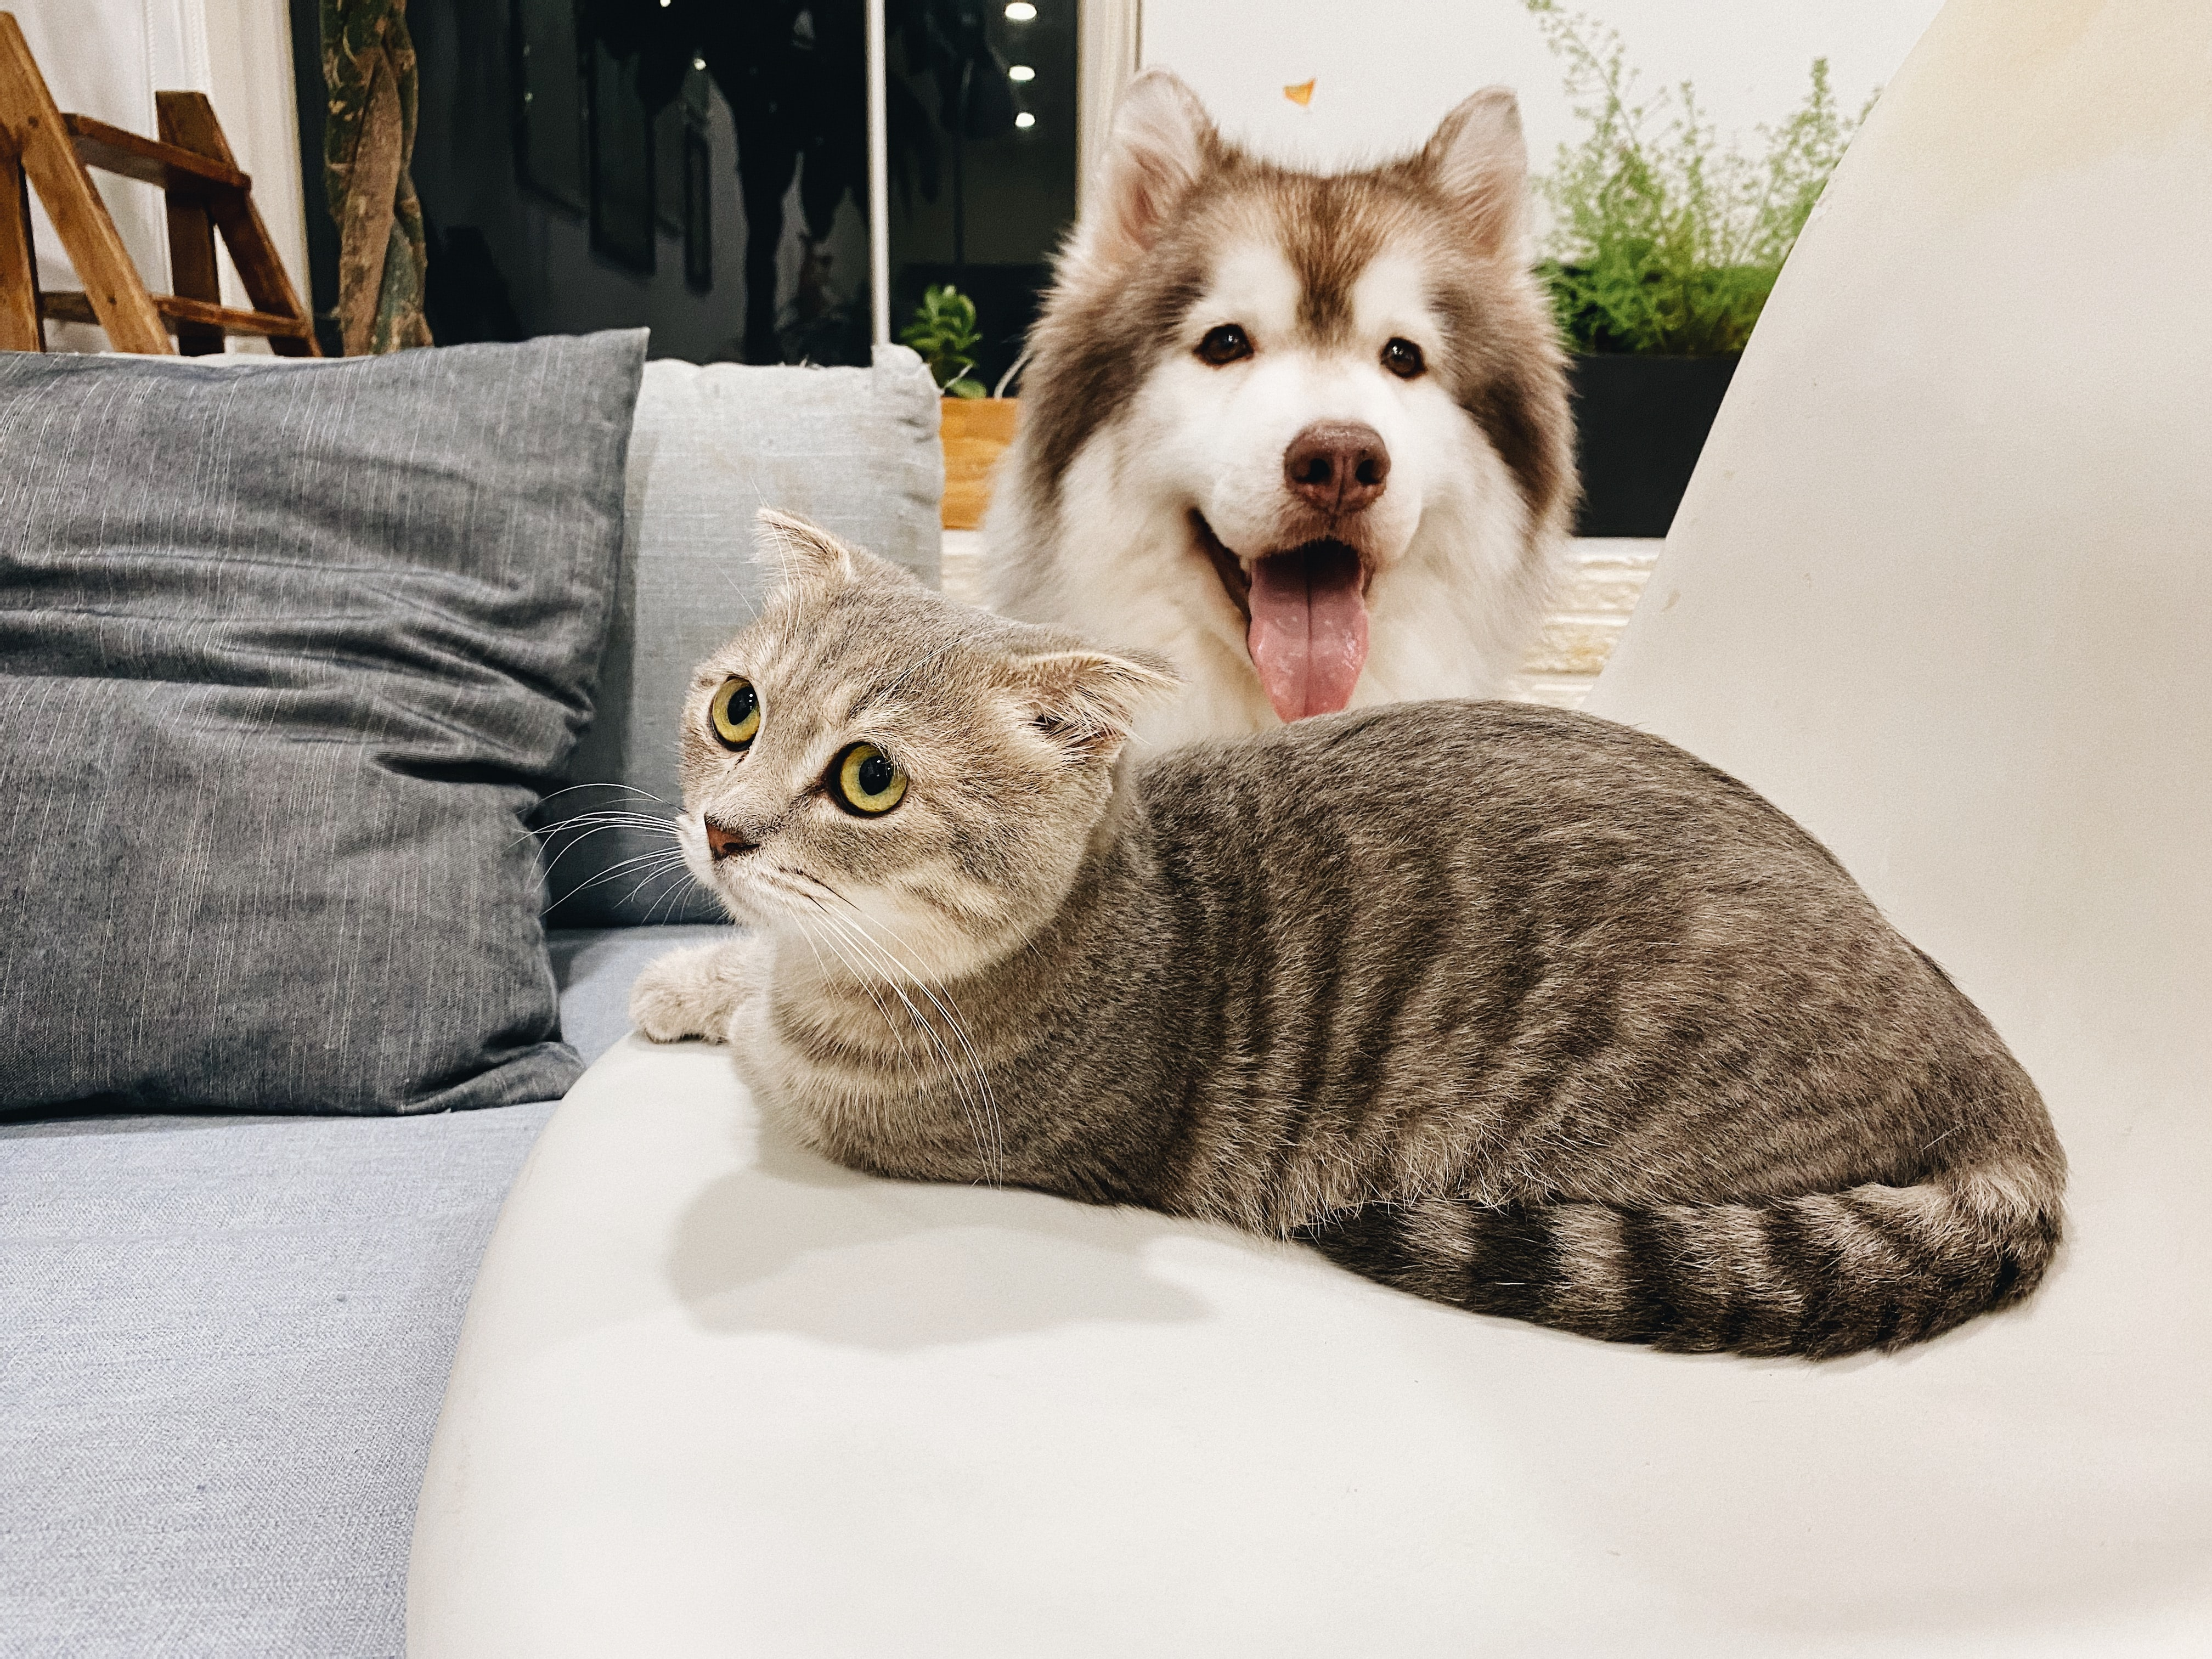

*So how a computer can learn to classify images via deep learning? * Deep learning was actually developed based on the neural network of human brain. 

Firstly, in order to train the computer, a certain amount of data need to be collected and prepared (images and labels), just like how the boy need to see the animals before asking any questions. 

Secondly, a nerual network model (or algorithmn) will be built and it will be improved iteratly via trails and errors. It is like how the boy mistook the dog to be a cat, and was corrected by his mother.

Lastly, after the training, we will show the computer the pictures that haven't been shown before in order to test the robustness of the model. If it doesn't work well, the training data and model will be optimized and adjusted until we have a good result.

## Performance Metric

This project uses log loss as the performance matric. The smaller the log loss, the better the result.

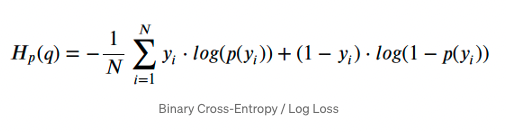


Where:
- N: The image quantity of the test set
- y: The label (1 for dogs and 0 for cats)
- p(y): The predicted probability of the picture being dog for all N points.

----

# 2. Analysis

## Data Exploration

The data set is downloaded from [Kaggle](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data), the download address can also be founded from the readme file. The image set is divided into two folders (train and test). The train folder contains 25,000 images. Each image file name contains a label (cat.107.jpg or dog.3023.jpg..etc). The test folder contains 12,500 images, and each file is named with a numeric id without label. Test set is for the final validation stage, let's ignore it for now and take a look at the train folder first.


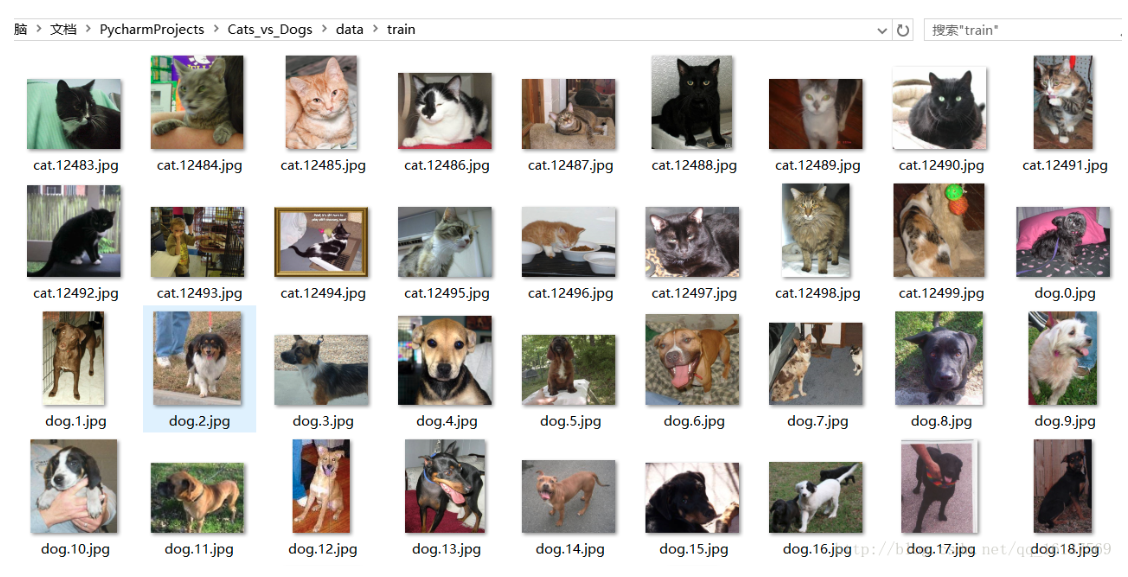

The train folder contains the same amount of dog and cat images (12,500 files for each). The image sizes varied from range:

- cat: 50x49 to 1023x768 (width x height) 
- dog: 42x62 to 1050x702 (width x height) 

To handle the size difference, a Keras method, flow_from_directory() is handy here. We can resize all the input images by simply setting the target_size parameter to 224x224. 

Finally, we will split training set, and move 20% of each category (cat and dog) to a validation folder as the validation set.

Most of the images in the training set are in decent quality. Features like nose, eyes, ears, and fur can be clearly identified. In addition, the animals are mostly placed in the major part of the images without any distracting background or unneccessary objects. 

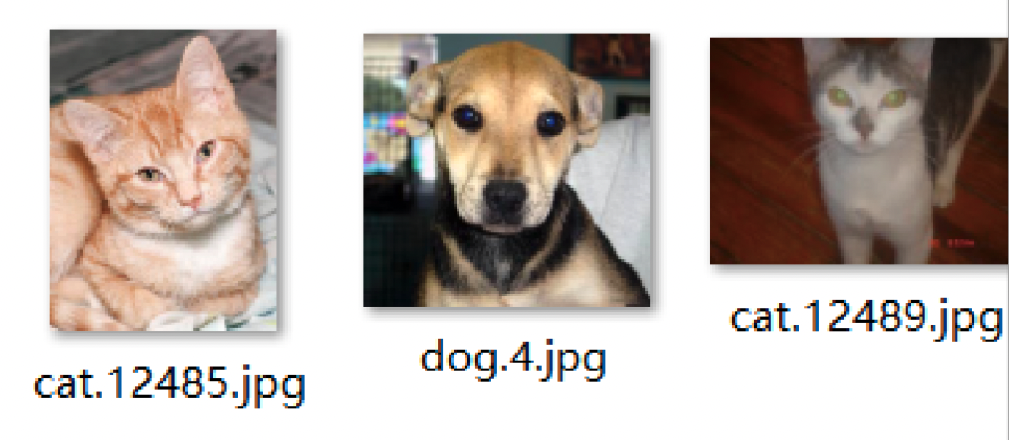

However, there are still some noisy images in the trainning set. For instance, some animals are relatively small comparing to other objects. Some images contain complicated backgrounds like parks, in-doors and public roads. There are also some distracting objects like human faces and limbs(left image below - dog.1148.jpg). Furthermore, some animal are artifically drawn like the cartoon dog (right picture below - dog.1259.jpg). Since these poor images will have negative impact to the performance of the model, some data cleaning and preparation must be carefully process before the trainning.

## Tools

We choose the Keras library as the main tool to develop the model due to its easy-to-use design and shallow learning curve. We will also use the transfer learning technique to lower the computation cost and increase the accuracy at the same time. For this purpose, Keras already provide us out-of-the-box models that have been trained. The models we are going to use are the followings:

- VGG16
- InceptionResNetV2
- Xception
- ResNet50

### VGG16

A convolutional neural network is also known as a ConvNet, which is a kind of artificial neural network. A convolutional neural network has an input layer, an output layer, and various hidden layers. VGG16 is a type of CNN (Convolutional Neural Network) that is considered to be one of the best computer vision models to date. The creators of this model evaluated the networks and increased the depth using an architecture with very small (3 × 3) convolution filters, which showed a significant improvement on the prior-art configurations. They pushed the depth to 16–19 weight layers making it approx — 138 trainable parameters.

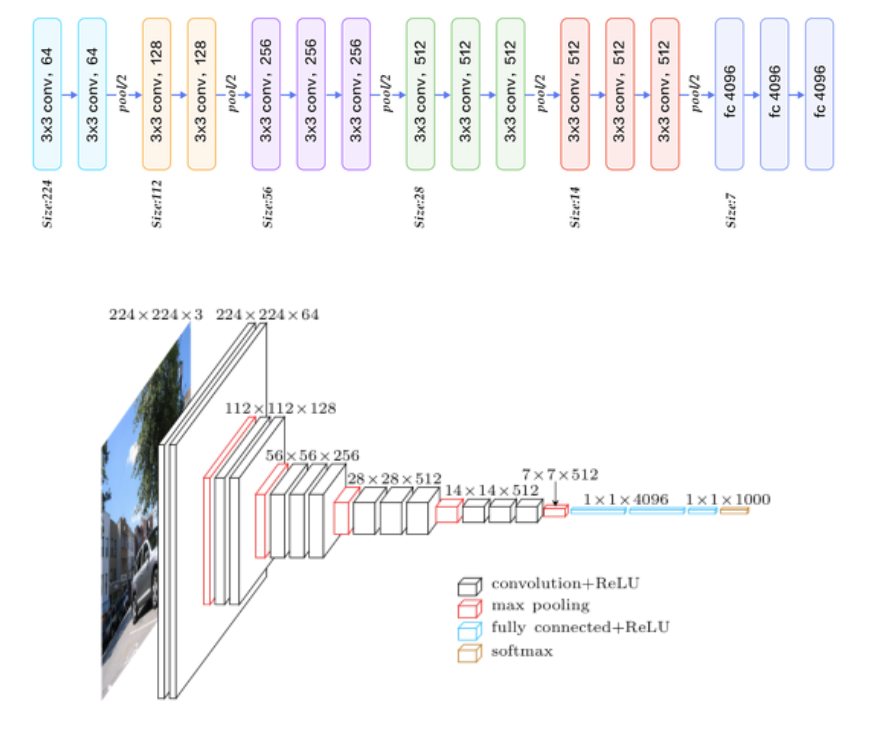

### InceptionResNetV2

Inception-ResNet-v2 is a convolutional neural network that is trained on more than a million images from the ImageNet database. The network is 164 layers deep and can classify images into 1000 object categories, such as the keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 299-by-299, and the output is a list of estimated class probabilities.



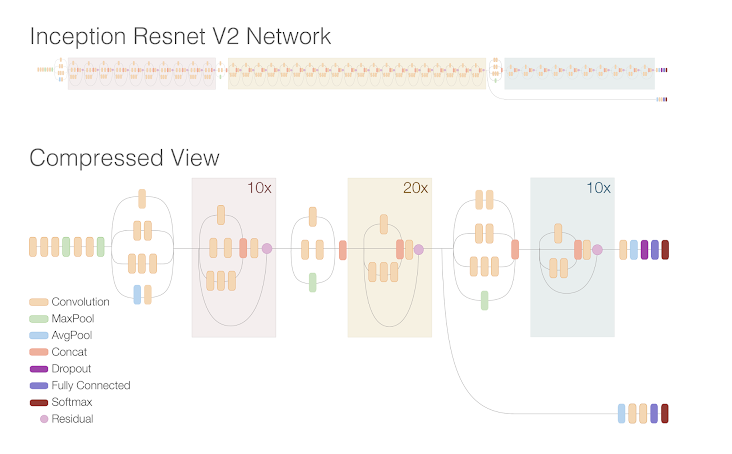

It is formulated based on a combination of the Inception structure and the Residual connection. In the Inception-Resnet block, multiple sized convolutional filters are combined with residual connections. The usage of residual connections not only avoids the degradation problem caused by deep structures but also reduces the training time. The figure shows the basic network architecture of Inception-Resnet-v2.

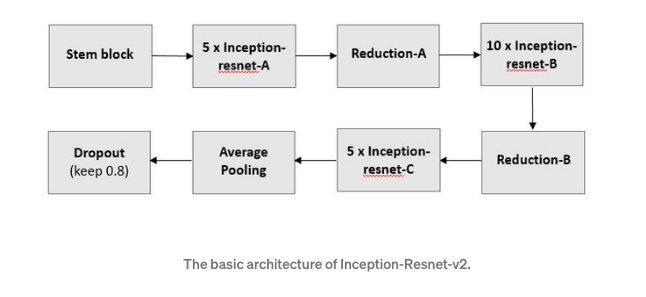

## Xception

Xception is a convolutional neural network. Xception is the pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals etc… The network has an image input size of 299X299.

model = xception(‘Weights’,’imagenet’) returns an Xception network trained on the ImageNet data set.

### Architecture
The Xception architecture has 36 convolutional layers forming the feature extraction base of the network.

The data first goes through the entry flow, then through the middle flow which is repeated eight times, and finally through the exit flow. Note that all Convolution and Separable Convolution layers are followed by batch normalization (not included in the diagram). All Separable Convolution layers use a depth multiplier of 1 (no depth expansion).

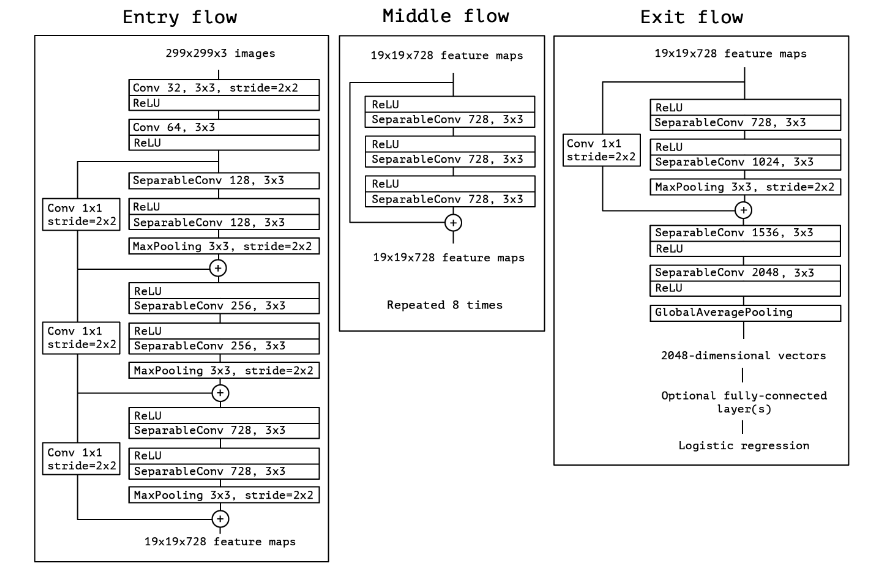

## ResNet50


.....
